# Image Classification Using Cifar-10 Dataset:
### A Comparison of Manhattan (L1) and Euclidean (L2) Distances with 5-fold Cross-Validation

---



## Setting Up

In [ ]:
!git clone https://github.com/YoongiKim/CIFAR-10-images

Cloning into 'CIFAR-10-images'...
remote: Enumerating objects: 60027, done.
remote: Total 60027 (delta 0), reused 0 (delta 0), pack-reused 60027
Receiving objects: 100% (60027/60027), 19.94 MiB | 42.36 MiB/s, done.
Resolving deltas: 100% (59990/59990), done.
Updating files: 100% (60001/60001), done.


In [ ]:
import cv2
import numpy as np
#np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
import os,glob
from os import listdir,makedirs
from os.path import isfile,join
from tqdm import tqdm
import random
from sklearn.model_selection import KFold
import statistics as st

In [ ]:
Train_Dir = '/content/CIFAR-10-images/test'
catagories = os.listdir(Train_Dir)

## Dataset & Preprocesing:

In [ ]:
#for setting up training images
train_img = []
for c in catagories:
  path = os.path.join(Train_Dir, c)
  print(c, end=" - ")
  for img in tqdm(os.listdir(path)):
    img_arr = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
    img_arr_resize= cv2.resize(img_arr, (32,32))
    train_img.append([img_arr_resize, c])

horse - 

100%|██████████| 1000/1000 [00:00<00:00, 14916.79it/s]


ship - 

100%|██████████| 1000/1000 [00:00<00:00, 27967.62it/s]


frog - 

100%|██████████| 1000/1000 [00:00<00:00, 28507.28it/s]


cat - 

100%|██████████| 1000/1000 [00:00<00:00, 27846.19it/s]


automobile - 

100%|██████████| 1000/1000 [00:00<00:00, 29255.71it/s]


dog - 

100%|██████████| 1000/1000 [00:00<00:00, 28100.09it/s]


bird - 

100%|██████████| 1000/1000 [00:00<00:00, 29605.74it/s]


deer - 

100%|██████████| 1000/1000 [00:00<00:00, 29638.16it/s]


truck - 

100%|██████████| 1000/1000 [00:00<00:00, 11998.98it/s]


airplane - 

100%|██████████| 1000/1000 [00:00<00:00, 6096.76it/s]


## Model Building and Evaluation:

In [ ]:
random.shuffle(train_img)

In [ ]:
KFactor = [0.25, 0.5, 1, 2, 4]
kf = KFold(n_splits=5, random_state=None, shuffle=False)
for i,(train_index, test_index) in enumerate(kf.split(train_img)):
    k_values = np.multiply(np.sqrt(train_index.size),KFactor)
    # k_values = np.arange(1,np.sqrt(train_index.size)*10,40)
    k_values = [int(x) for x in k_values]
    break

In [ ]:
accuracy = np.zeros((2,len(k_values),kf.n_splits), dtype=int)

In [ ]:
top_five = [[[],0],[[],0],[[],0],[[],0],[[],0]] #image, index, percentage of labels that matched
def top5pred(comp, train_img, k):
    counter = comp.count(train_img[1])*100/k
    if counter > top_five[0][1]:
        top_five[0] = [train_img,counter]
        top_five.sort(key=lambda x: x[1])

In [36]:
res = []
for i,(train_index, test_index) in enumerate(kf.split(train_img)):
    print('Fold ', i+1, end=" - ")
    for x in tqdm(test_index):
        r = []
        testData = train_img[x][0]
        l1 = []
        l2 = []
        for y in train_index:
            trainData = train_img[y][0]
            d = np.sum(abs(testData-trainData))
            l1.append(d)
            d = np.sqrt(np.sum((testData-trainData)**2))
            l2.append(d)
        l1_i = np.argsort(l1)
        l2_i = np.argsort(l2)
        for k in k_values:
            comp = []
            for j in l1_i[:k]:
                comp.append(train_img[j][1])
            top5pred(comp,train_img[x],k)
            if st.mode(comp) == train_img[x][1]:
                accuracy[0][k_values.index(k)][i] += 1
            comp = []
            for j in l2_i[:k]:
                comp.append(train_img[j][1])
            top5pred(comp,train_img[x],k)
            if st.mode(comp) == train_img[x][1]:
                accuracy[1][k_values.index(k)][i] += 1

Fold  1 - 

100%|██████████| 2000/2000 [03:58<00:00,  8.38it/s]


Fold  2 - 

100%|██████████| 2000/2000 [03:57<00:00,  8.44it/s]


Fold  3 - 

100%|██████████| 2000/2000 [03:57<00:00,  8.42it/s]


Fold  4 - 

100%|██████████| 2000/2000 [03:52<00:00,  8.61it/s]


Fold  5 - 

100%|██████████| 2000/2000 [03:53<00:00,  8.56it/s]


## Results and Analysis:

In [38]:
L1_acc = [[],[]]
L2_acc = [[],[]]
for a in accuracy[0]:
    L1_acc[0].append(a.mean()*100/2000)
    L1_acc[1].append(a.std()*100/2000)
for a in accuracy[1]:
    L2_acc[0].append(a.mean()*100/2000)
    L2_acc[1].append(a.std()*100/2000)

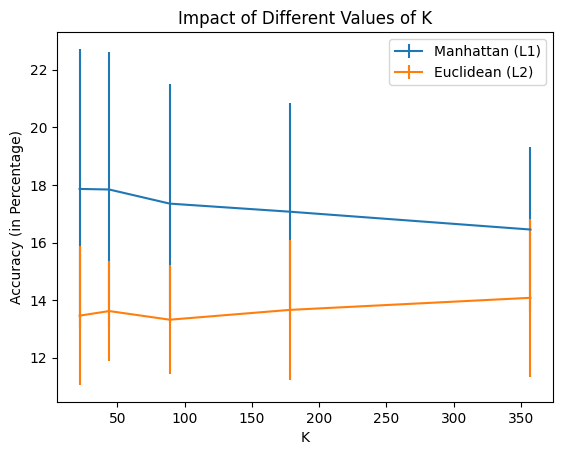

In [39]:
plt.figure()
plt.errorbar(k_values, L1_acc[0], L1_acc[1])
plt.errorbar(k_values, L2_acc[0], L2_acc[1])
plt.legend(['Manhattan (L1)','Euclidean (L2)'])
plt.xlabel('K')
plt.ylabel('Accuracy (in Percentage)')
plt.title('Impact of Different Values of K')

plt.show()

# Top Five Predictions

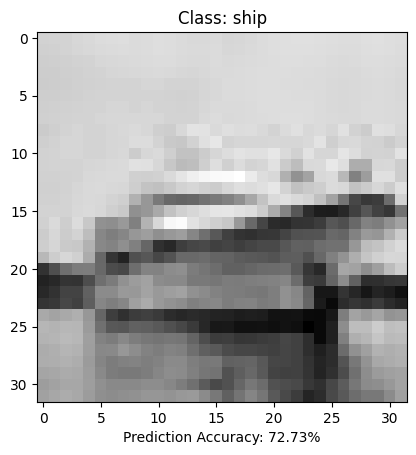

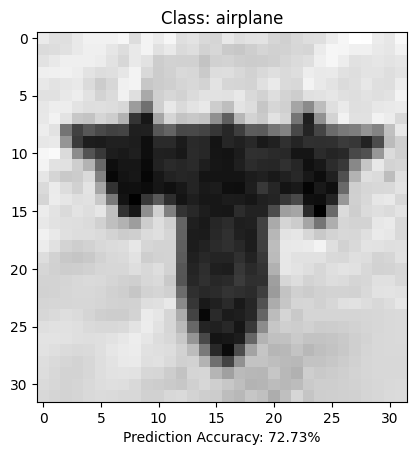

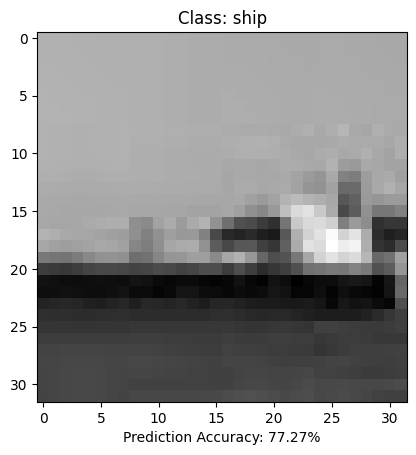

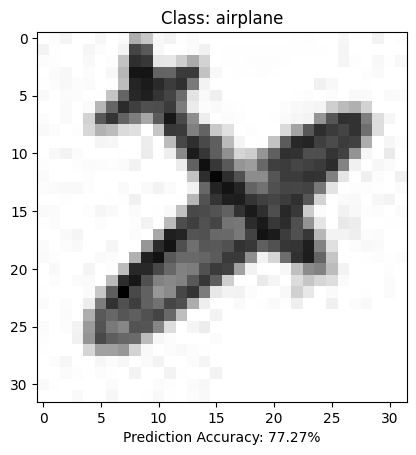

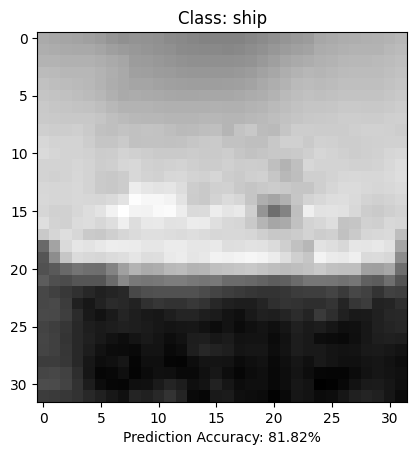

In [56]:
for x in top_five:
    plt.figure()
    plt.imshow(x[0][0], cmap='gray')
    plt.xlabel(f"Prediction Accuracy: {x[1]:.2f}%")
    plt.title(f"Class: {x[0][1]}")
    plt.show()